# Impact of Academic Factors on Final Grades

The test below looks into.......

## Features Related to Academic Factors

### Independent Variables: 
**studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) <br>
**failures** - number of past class failures (numeric: n if 1<=n<3, else 4) <br>
**schoolsup** - extra educational support (binary: yes or no) <br>
**famsup** - family educational support (binary: yes or no) <br>
**paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) <br>
**higher** - wants to take higher education (binary: yes or no)<br>

### Dpendent Variables: 
**G1** - first period grade (numeric: from 0 to 20) <br>
**G2** - second period grade (numeric: from 0 to 20) <br>
**G3** - final grade (numeric: from 0 to 20, output target) <br>

In [228]:
# Import libraries
import pandas as pd
import math
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.formula.api as smf

In [66]:
# Read in the datasets
students_mat = pd.read_csv('../dataset/student-mat.csv', delimiter=';')
students_por = pd.read_csv('../dataset/student-por.csv', delimiter=';')

# Merge common students
mat_students = students_mat.merge(students_por[["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]])
por_students = students_por.merge(students_mat[["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]])

# Filter out for academic features
mat_students = mat_students[['studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'G1', 'G2', 'G3']]
por_students = por_students[['studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'G1', 'G2', 'G3']]

In [67]:
mat_students.head(3) # View the math dataset

,studytime,failures,schoolsup,famsup,paid,higher,G1,G2,G3
0,2,0,yes,no,no,yes,5,6,6
1,2,0,no,yes,no,yes,5,5,6
2,2,3,yes,no,yes,yes,7,8,10


In [167]:
por_students.head(3) # View the por dataset

,studytime,failures,schoolsup,famsup,paid,higher,G1,G2,G3
0,2,0,yes,no,no,yes,0,11,11
1,2,0,no,yes,no,yes,9,11,11
2,2,0,yes,no,no,yes,12,13,12


In [168]:
# Create a dictionary mapping 'yes' to 1 and 'no' to 0
mapping = {'yes': 1, 'no': 0}

mat_students['schoolsup'] = mat_students['schoolsup'].replace(mapping)
mat_students['famsup'] = mat_students['famsup'].replace(mapping)
mat_students['paid'] = mat_students['paid'].replace(mapping)
mat_students['higher'] = mat_students['higher'].replace(mapping)
por_students['schoolsup'] = por_students['schoolsup'].replace(mapping)
por_students['famsup'] = por_students['famsup'].replace(mapping)
por_students['paid'] = por_students['paid'].replace(mapping)
por_students['higher'] = por_students['higher'].replace(mapping)

In [169]:
mat_students.describe().applymap('{:,.2f}'.format).T # descriptive statistics for mat class

,count,mean,std,min,25%,50%,75%,max
studytime,382.00,2.03,0.85,1.00,1.00,2.00,2.00,4.00
failures,382.00,0.29,0.73,0.00,0.00,0.00,0.00,3.00
schoolsup,382.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
famsup,382.00,0.62,0.49,0.00,0.00,1.00,1.00,1.00
paid,382.00,0.46,0.50,0.00,0.00,0.00,1.00,1.00
higher,382.00,0.95,0.21,0.00,1.00,1.00,1.00,1.00
G1,382.00,10.86,3.35,3.00,8.00,10.50,13.00,19.00
G2,382.00,10.71,3.83,0.00,8.25,11.00,13.00,19.00
G3,382.00,10.39,4.69,0.00,8.00,11.00,14.00,20.00


In [170]:
por_students.describe().applymap('{:,.2f}'.format).T # descriptive statistics for por class

,count,mean,std,min,25%,50%,75%,max
studytime,382.00,2.04,0.85,1.00,1.00,2.00,2.00,4.00
failures,382.00,0.14,0.51,0.00,0.00,0.00,0.00,3.00
schoolsup,382.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
famsup,382.00,0.63,0.48,0.00,0.00,1.00,1.00,1.00
paid,382.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
higher,382.00,0.95,0.21,0.00,1.00,1.00,1.00,1.00
G1,382.00,12.11,2.56,0.00,10.00,12.00,14.00,19.00
G2,382.00,12.24,2.47,5.00,11.00,12.00,14.00,19.00
G3,382.00,12.52,2.95,0.00,11.00,13.00,14.00,19.00


In [172]:
columns = ['studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'higher']  # independent variables
n_plots = len(columns) 

# Plot frequency distributions for each independent variable
def plot_variables(table):
    gs = gridspec.GridSpec(2, 3)
    fig = plt.figure(figsize=(12,8))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        table[columns[i]].value_counts().sort_index().plot(kind='bar', ax=ax, edgecolor='black')
        ax.set_xlabel(columns[i])
        ax.set_ylabel('Count')
        ax.set_title('Histogram for variable: ' + columns[i])
    fig.tight_layout()
    plt.show()

MAT STUDENTS


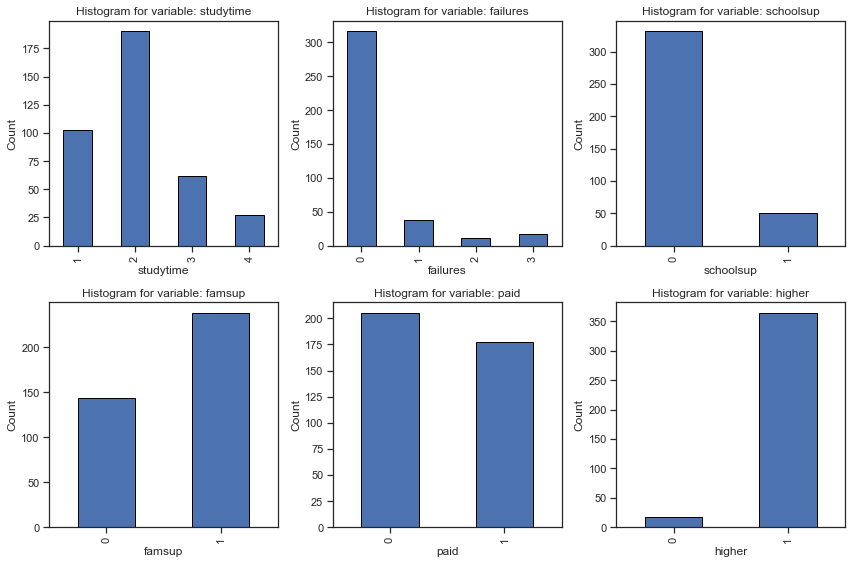

POR STUDENTS


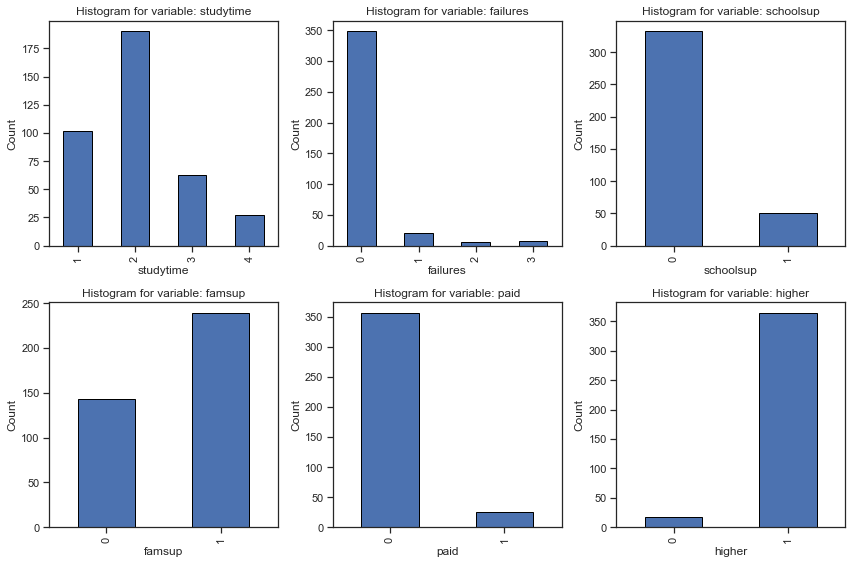

In [176]:
print('MAT STUDENTS')
plot_variables(mat_students)
print('POR STUDENTS')
plot_variables(por_students)

In [177]:
studytime = [1, 2, 3, 4]

# Grouped bar chart of mean grades per study time group
def grouped_bar(table):
    width = 0.2
    for x in studytime:
        y1 = table.loc[table['studytime'] == x]['G1'].mean()
        y2 = table.loc[table['studytime'] == x]['G2'].mean()
        y3 = table.loc[table['studytime'] == x]['G3'].mean()
        plt.bar(x-0.2, y1, width, color='blue', edgecolor='black') 
        plt.bar(x, y2, width, color='orange', edgecolor='black') 
        plt.bar(x+0.2, y3, width, color='green', edgecolor='black') 

    plt.xticks(studytime) 
    plt.xlabel("Study Time") 
    plt.ylabel("Mean Grade")
    plt.title("Grouped Bar Chart of Mean Grades vs Study Time")
    plt.legend(["G1", "G2", "G3"], loc='lower center') 
    plt.show() 

MAT STUDENTS


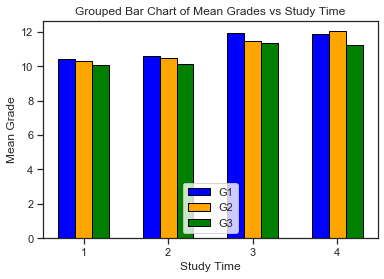

POR STUDENTS


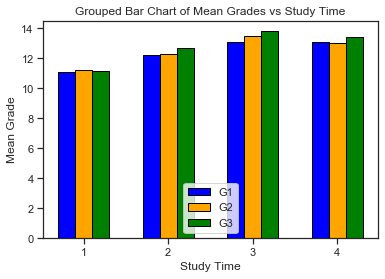

In [180]:
print("MAT STUDENTS")
grouped_bar(mat_students)
print("POR STUDENTS")
grouped_bar(por_students)

## Significance Testing Using Chi-Squared Test
Since the variables we are dealing with are categorical.

In [225]:
# check if variables are correlated with each other
mat_students[columns].corr() # correlation matrix for independent variables

,studytime,failures,schoolsup,famsup,paid,higher
studytime,1.000000,-0.198990,0.029744,0.159236,0.161443,0.184467
failures,-0.198990,1.000000,0.023038,-0.023408,-0.197673,-0.369164
schoolsup,0.029744,0.023038,1.000000,0.082983,-0.025172,0.014643
famsup,0.159236,-0.023408,0.082983,1.000000,0.267807,0.081949
paid,0.161443,-0.197673,-0.025172,0.267807,1.000000,0.181856
higher,0.184467,-0.369164,0.014643,0.081949,0.181856,1.000000


In [224]:
por_students[columns].corr() # correlation matrix for independent variables

,studytime,failures,schoolsup,famsup,paid,higher
studytime,1.000000,-0.200304,0.027910,0.151267,-0.024875,0.185895
failures,-0.200304,1.000000,0.044395,-0.039946,0.128251,-0.324302
schoolsup,0.027910,0.044395,1.000000,0.091692,0.049211,0.013041
famsup,0.151267,-0.039946,0.091692,1.000000,0.101653,0.083265
paid,-0.024875,0.128251,0.049211,0.101653,1.000000,0.011043
higher,0.185895,-0.324302,0.013041,0.083265,0.011043,1.000000


The correlation matrices show that the selected independent variables, for both classes MAT and POR, do not have multicolinearity (values > 0.7).

(1) Assumptions
(2) Hypotheses
(3) Test Statistic
(4) P-Value and Conclusion

In [144]:
# Define chi-square test function
def chisquare_test(test_name, table, alpha= 0.05):
    stat, p_value, dof, expected = chi2_contingency(table, correction=False)
    print(test_name+"p-value: {}".format(p_value))

In [182]:
# Perform chi-square test to determine if there is a relationship between studytime and grades
chisquare_test("MAT: Study Time vs G1 ",pd.crosstab(mat_students['studytime'], mat_students['G1']), 0.05)
chisquare_test("MAT: Study Time vs G2 ",pd.crosstab(mat_students['studytime'], mat_students['G2']), 0.05)
chisquare_test("MAT: Study Time vs G3 ",pd.crosstab(mat_students['studytime'], mat_students['G3']), 0.05)
chisquare_test("POR: Study Time vs G1 ",pd.crosstab(por_students['studytime'], por_students['G1']), 0.05)
chisquare_test("POR: Study Time vs G2 ",pd.crosstab(por_students['studytime'], por_students['G2']), 0.05)
chisquare_test("POR: Study Time vs G3 ",pd.crosstab(por_students['studytime'], por_students['G3']), 0.05)

MAT: Study Time vs G1 p-value: 0.0770441675882667
MAT: Study Time vs G2 p-value: 0.2968236380469386
MAT: Study Time vs G3 p-value: 0.19679543951428116
POR: Study Time vs G1 p-value: 1.686899575169806e-05
POR: Study Time vs G2 p-value: 0.00023375340825898132
POR: Study Time vs G3 p-value: 0.013148231472873109


conclusion....

No significant p-values for study time vs grades in the math class, but all significant p-values for study time in portugues class. This could suggest that subjects such as language improve with more practice stronger than math.

## Significance Testing Using Independent T-Test Comparing Mean Grades Across Study Times

In [216]:
grades = ['G1', 'G2', 'G3']

# Independent T-test Comparing Means Grades Across Study Times
def create_ttest_table(table):
    data = []
    for grade in grades:
        x1 = table.loc[table['studytime'] == 1][grade]
        x2 = table.loc[table['studytime'] == 2][grade]
        x3 = table.loc[table['studytime'] == 3][grade]
        x4 = table.loc[table['studytime'] == 4][grade]
        ttests = [stats.ttest_ind(x1,x2)[1], 
                  stats.ttest_ind(x1,x3)[1],
                  stats.ttest_ind(x1,x4)[1],
                  stats.ttest_ind(x2,x3)[1],
                  stats.ttest_ind(x2,x4)[1],
                  stats.ttest_ind(x3,x4)[1]]
        data.append([1, 2, grade, ttests[0], '*' if ttests[0] < 0.05 else ''])
        data.append([1, 3, grade, ttests[1], '*' if ttests[1] < 0.05 else ''])
        data.append([1, 4, grade, ttests[2], '*' if ttests[2] < 0.05 else ''])
        data.append([2, 3, grade, ttests[3], '*' if ttests[3] < 0.05 else ''])
        data.append([2, 4, grade, ttests[4], '*' if ttests[4] < 0.05 else ''])
        data.append([3, 4, grade, ttests[5], '*' if ttests[5] < 0.05 else ''])
    
    return pd.DataFrame(data, columns=['studytime A', 'studytime B', 'grade', 'p-value', '|< 0.05|'])

In [217]:
create_ttest_table(mat_students)

,studytime A,studytime B,grade,p-value,|< 0.05|
0,1,2,G1,0.735607,
1,1,3,G1,0.007074,*
2,1,4,G1,0.066284,
3,2,3,G1,0.003279,*
4,2,4,G1,0.049588,*
5,3,4,G1,0.933435,
6,1,2,G2,0.724652,
7,1,3,G2,0.091523,
8,1,4,G2,0.058567,
9,2,3,G2,0.059975,


In [218]:
create_ttest_table(por_students)

,studytime A,studytime B,grade,p-value,|< 0.05|
0,1,2,G1,3.003601e-04,*
1,1,3,G1,5.454160e-07,*
2,1,4,G1,3.295387e-04,*
3,2,3,G1,9.698778e-03,*
4,2,4,G1,7.425055e-02,
5,3,4,G1,1.000000e+00,
6,1,2,G2,4.783596e-04,*
7,1,3,G2,1.651362e-08,*
8,1,4,G2,1.298302e-03,*
9,2,3,G2,3.278645e-04,*


Explain results......
shows that more study time higher average grade, based statistically significant findings

## Multiple Regression Analysis
Analyzing what effect each feature has on final grades.....

In [230]:
model = smf.ols(formula = 'G3 ~ studytime + failures + schoolsup + famsup + paid + higher', data=mat_students).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     12.28
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.25e-12
Time:                        07:37:39   Log-Likelihood:                -1097.4
No. Observations:                 382   AIC:                             2209.
Df Residuals:                     375   BIC:                             2236.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9898      1.217      7.388      0.000       6.597      11.382
studytime      0.0755      0.273      0.276      0.782      -0.461       0.612
failures      -2.1352      0.333     -6.408      0.000      -2.790      -1.480
schoolsup     -0.8653      0.653     -1.325      0.186      -2.150       0.419
famsup        -0.6914      0.480     -1.441      0.150      -1.635       0.252
paid           0.2844      0.474      0.600      0.549      -0.647       1.216
higher         2.3918      1.138      2.102      0.036       0.154       4.629
==============================================================================
Omnibus:                       29.407   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.240
Skew:                          -0.676   Prob(JB):                     3.67e-08
Kurtosis:                       3.567   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
model = smf.ols(formula = 'G3 ~ studytime + failures + schoolsup + famsup + paid + higher', data=por_students).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     18.71
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           4.64e-19
Time:                        07:41:39   Log-Likelihood:                -904.17
No. Observations:                 382   AIC:                             1822.
Df Residuals:                     375   BIC:                             1850.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6352      0.714     12.094      0.000       7.231      10.039
studytime      0.6800      0.164      4.143      0.000       0.357       1.003
failures      -1.2489      0.281     -4.444      0.000      -1.801      -0.696
schoolsup     -1.2050      0.398     -3.030      0.003      -1.987      -0.423
famsup         0.3467      0.282      1.231      0.219      -0.207       0.900
paid          -1.1344      0.538     -2.110      0.036      -2.192      -0.077
higher         2.8214      0.673      4.195      0.000       1.499       4.144
==============================================================================
Omnibus:                       84.868   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.784
Skew:                          -0.951   Prob(JB):                     2.94e-66
Kurtosis:                       6.917   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Explain results......